In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

Text(0, 0.5, 'y')

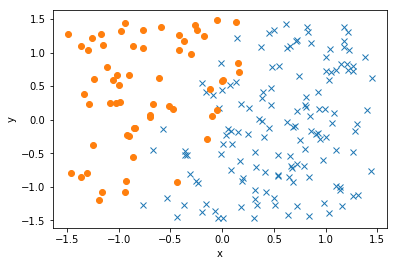

In [2]:
# prepare dataset
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

plt.plot(np.extract(y_d4>0,x_d4[:,0]),np.extract(y_d4>0,x_d4[:,1]), 'x')
plt.plot(np.extract(y_d4<0,x_d4[:,0]),np.extract(y_d4<0,x_d4[:,1]), 'o')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'loss')

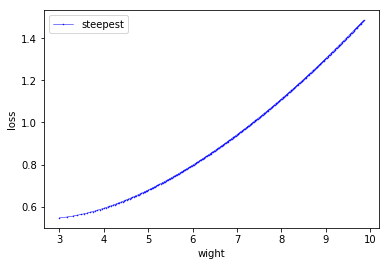

In [6]:
# 1. implement batch steepest gradient method
num_iter = 300
ww = 3
alpha_base = 1
lam = 0.01
ll_history = []
ww_history = []
lip = 0.25 * max(x_d4[:,0]**2);

for t in range(1,num_iter+1):
    posterior = 1 / (1 + np.exp(-y_d4 * (ww * x_d4[:,0] + x_d4[:, 1])));
    direction =  1 / n * np.sum((1 - posterior) * y_d4 * x_d4[:,0]) + 2 * lam * ww
    ll = 1/n  * np.sum(np.log(1 + np.exp(-y_d4 * (ww * x_d4[:,0] + x_d4[:,1])))) + lam * (ww**2 + 1)
    ww_history.append(ww);
    ll_history.append(ll);
    ww = ww + alpha_base * 1.0 / np.sqrt(t) / lip * direction;

plt.plot(ww_history, ll_history, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('wight')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

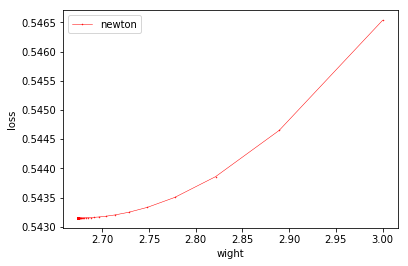

In [7]:
# 2. implement Newton based method
ll_n_history = np.zeros(num_iter)
ww_n_history = np.zeros(num_iter)
ww = 3

for t in range(num_iter):
    posterior = 1 / (1 + np.exp(-y_d4 * (ww * x_d4[:,0] + x_d4[:,1])))
    
    grad = 1 / n * np.sum((1 - posterior) * (-y_d4) * x_d4[:,0]) + 2 * lam * ww
    hess = 1 / n * np.sum(posterior * (1 - posterior) * x_d4[:,0]**2) + 2 * lam
    ll = 1/n  * np.sum(np.log(1.0 + np.exp(-y_d4 * (ww * x_d4[:,0] + x_d4[:,1])))) + lam * (ww**2 + 1)
    ww_n_history[t] =  ww
    ll_n_history[t] = ll
    ww = ww - grad/hess * 1.0 / np.sqrt(t+10)

plt.plot(ww_n_history, ll_n_history, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('wight')
plt.ylabel('loss')

Text(0, 0.5, 'difference from ground truth')

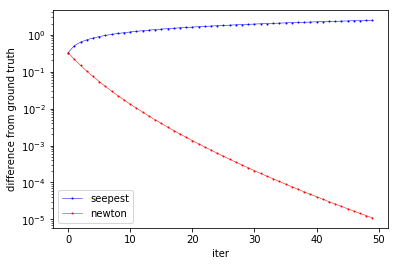

In [12]:
# 3. comparte the performance of two methods
show_iter = 50
plt.plot(np.abs(ww_history[:show_iter] - ww), 'bo-', linewidth=0.5, markersize=1, label='seepest')
plt.plot(np.abs(ww_n_history[:show_iter] - ww), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('difference from ground truth')